In [199]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [200]:
print(sklearn.__version__)
print(pd.__version__)

0.23.1
1.0.5


In [201]:
df = pd.read_csv('input/train.csv')

In [202]:
missing_list = ['Age', 'Embarked']
df.dropna(subset=['Age', 'Embarked'], inplace=True)

In [203]:
#Nameの処理　敬称を取り出す

df['Salutation'] = df.Name.str.extract(' ([A-Za-z]+).', expand=False) 
df['Salutation'] = df['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Salutation'] = df['Salutation'].replace('Mlle', 'Miss')
df['Salutation'] = df['Salutation'].replace('Ms', 'Miss')
df['Salutation'] = df['Salutation'].replace('Mme', 'Mrs')
del df['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

df['Salutation'] = df['Salutation'].map(Salutation_mapping) 
df['Salutation'] = df['Salutation'].fillna(0)
        
salutation = df['Salutation']
salutation_ohe = pd.get_dummies(salutation)
df = pd.concat([df, salutation_ohe], axis=1)
df.drop('Salutation', axis=1, inplace=True)




In [204]:
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

In [205]:
embarked = df['Embarked']
embarked_ohe = pd.get_dummies(embarked)
df = pd.concat([df, embarked_ohe], axis=1)
df.drop('Embarked', axis=1, inplace=True)

In [206]:
drop_list = ['PassengerId', 'Ticket', 'Cabin']

df.drop(drop_list, axis=1, inplace=True)

In [207]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,0.0,1.0,2.0,3.0,4.0,5.0,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,0,0,0,1,0,0,0,1,0
886,0,2,0,27.0,0,0,13.0000,0,0,0,0,0,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1,0,0,0,0,0,1
889,1,1,0,26.0,0,0,30.0000,0,1,0,0,0,0,1,0,0


カテゴリカル変数 |データとの対応  
---|---
Sex |0=male, 1=female
0.0|敬称なし
1.0|Mr
2.0|Miss
3.0|Mrs
4.0|Master
5.0|敬称その他



## 特徴量セット1の作成

In [208]:
feat1=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df1 = df[feat1]

In [209]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [210]:
X1 = df1.iloc[:, 1:].values
y1 = df1.iloc[:, 0].values

In [211]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=11, stratify=y1)

In [212]:
print(len(y1_train),len(y1_test))

498 214


## 特徴量セット2

In [213]:
X2 = df.iloc[:, 1:].values
y2 = df.iloc[:, 0].values

In [214]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=11,stratify=y2)

In [215]:
train_set = [(X1_train, y1_train), (X2_train, y2_train)]
test_set = [(X1_test, y1_test), (X2_test, y2_test)]
train_ratio = np.linspace(0.1,1,10)

In [216]:
y2

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

## knn3種類

In [217]:
model1 = knn(n_neighbors=5)
model2 = knn(n_neighbors=10)
model3 = knn(n_neighbors=20)
knns = [model1, model2, model3]

## ランダムフォレスト3種類

In [218]:
model4 = rfc(max_depth=5)
model5 = rfc(max_depth=10)
model6 = rfc(max_depth=None)
rfcs = [model4, model5, model6]

## SVM3種類

In [219]:
model7 = SVC(kernel='rbf', gamma=0.01)
model8 = SVC(kernel='rbf', gamma=0.1)
model9 = SVC(kernel='rbf', gamma=1)
SVCs = [model7, model8, model9]

In [220]:
methods = {'knn': knns, 'RFC' : rfcs, 'SVC':SVCs}

In [221]:
methods

{'knn': [KNeighborsClassifier(),
  KNeighborsClassifier(n_neighbors=10),
  KNeighborsClassifier(n_neighbors=20)],
 'RFC': [RandomForestClassifier(max_depth=5),
  RandomForestClassifier(max_depth=10),
  RandomForestClassifier()],
 'SVC': [SVC(gamma=0.01), SVC(gamma=0.1), SVC(gamma=1)]}

# 比較の実行

In [222]:
results={}

for method in methods:
    models = methods[method]
    for i, model in enumerate(models):
        model_name = method+str(i+1)
        results[model_name]=[]
        for j, train_data in enumerate(train_set):
            X_test, y_test = test_set[j]
            for ratio in train_ratio:
                cap = '特徴量'+str(j+1)+'，訓練データの利用割合'+str(ratio)
                if ratio < 1:
                    X_train, _, y_train, _ = train_test_split(train_data[0], train_data[1], test_size=ratio, random_state=11, stratify=train_data[1])
                else:
                    X_train, y_train = train_data
                model.fit(X_train, y_train)
                y_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)
                train_accuracy = accuracy_score(y_train, y_pred)
                test_accuracy = accuracy_score(y_test, y_test_pred)
                results[model_name].append((cap, (train_accuracy, test_accuracy)))

In [223]:
results

{'knn1': [('特徴量1，訓練データの利用割合0.1', (0.7589285714285714, 0.6542056074766355)),
  ('特徴量1，訓練データの利用割合0.2', (0.7638190954773869, 0.6588785046728972)),
  ('特徴量1，訓練データの利用割合0.30000000000000004',
   (0.7672413793103449, 0.6401869158878505)),
  ('特徴量1，訓練データの利用割合0.4', (0.7516778523489933, 0.6261682242990654)),
  ('特徴量1，訓練データの利用割合0.5', (0.7349397590361446, 0.6401869158878505)),
  ('特徴量1，訓練データの利用割合0.6', (0.7386934673366834, 0.6822429906542056)),
  ('特徴量1，訓練データの利用割合0.7000000000000001',
   (0.7248322147651006, 0.6682242990654206)),
  ('特徴量1，訓練データの利用割合0.8', (0.7575757575757576, 0.6728971962616822)),
  ('特徴量1，訓練データの利用割合0.9', (0.7551020408163265, 0.6728971962616822)),
  ('特徴量1，訓練データの利用割合1.0', (0.7630522088353414, 0.6355140186915887)),
  ('特徴量2，訓練データの利用割合0.1', (0.7790178571428571, 0.6915887850467289)),
  ('特徴量2，訓練データの利用割合0.2', (0.7889447236180904, 0.6915887850467289)),
  ('特徴量2，訓練データの利用割合0.30000000000000004',
   (0.7787356321839081, 0.6869158878504673)),
  ('特徴量2，訓練データの利用割合0.4', (0.7684563758389261, 0.6728

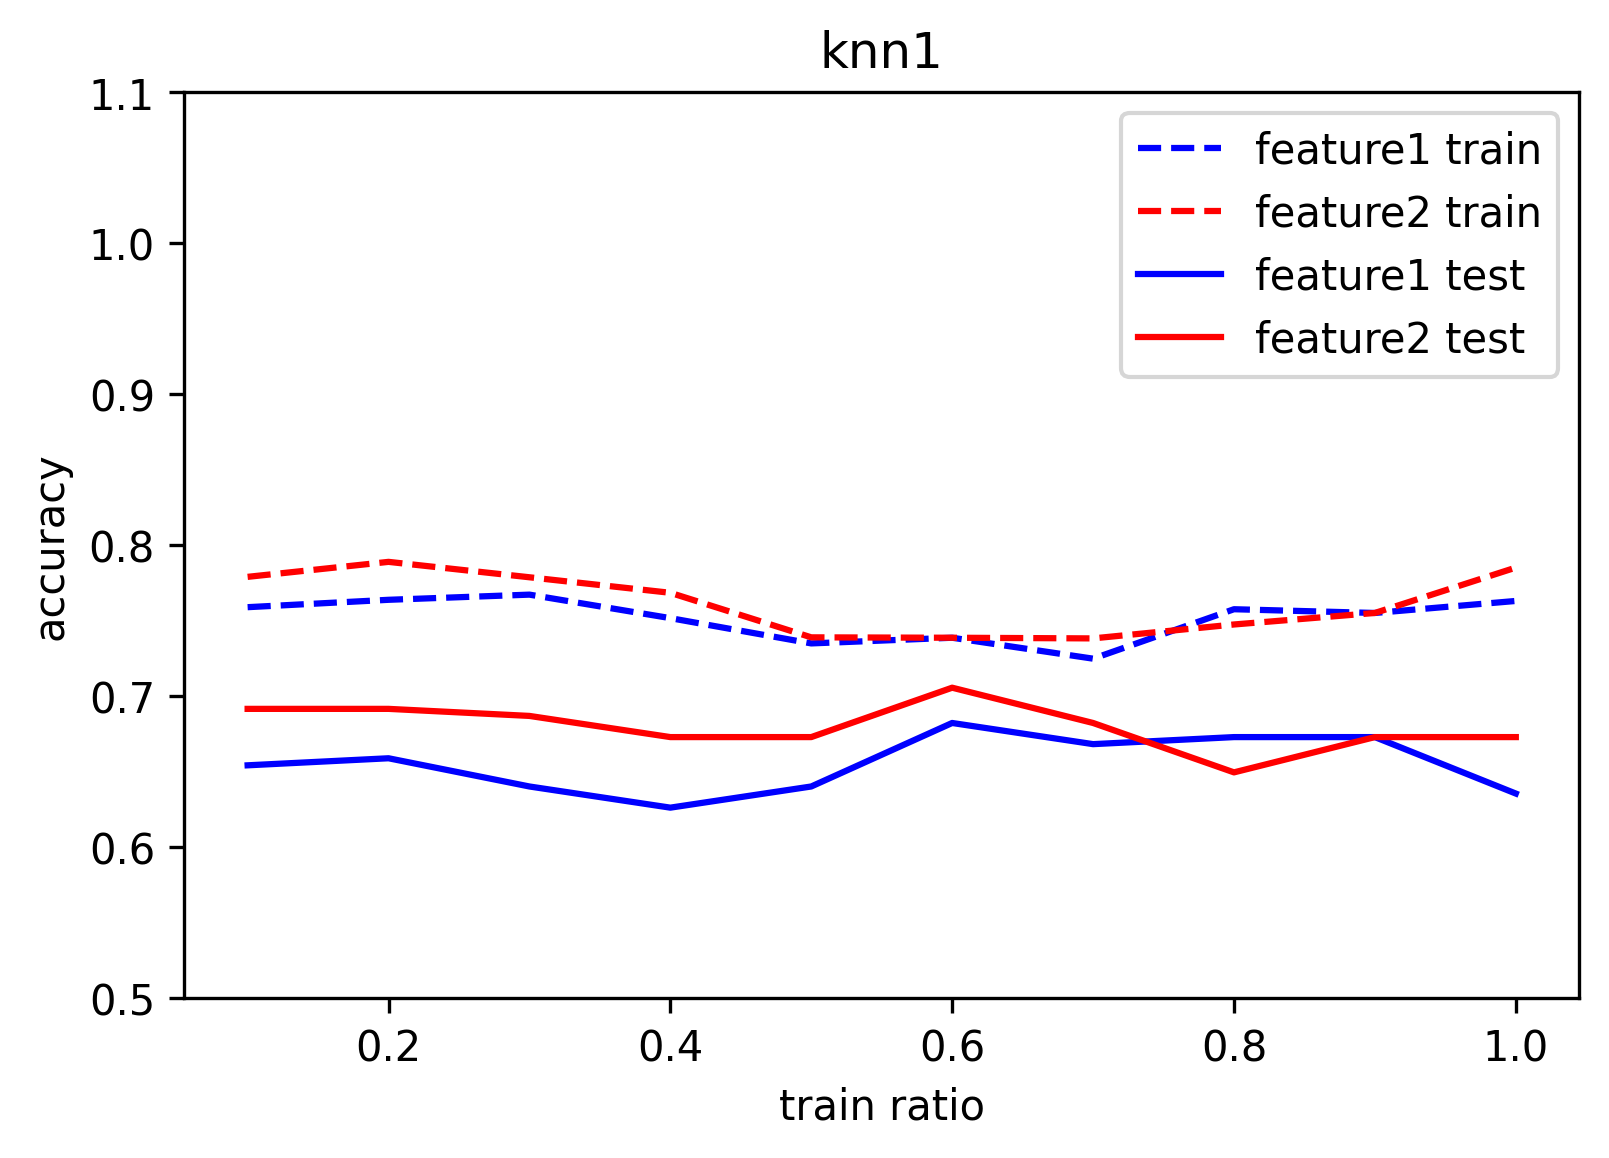

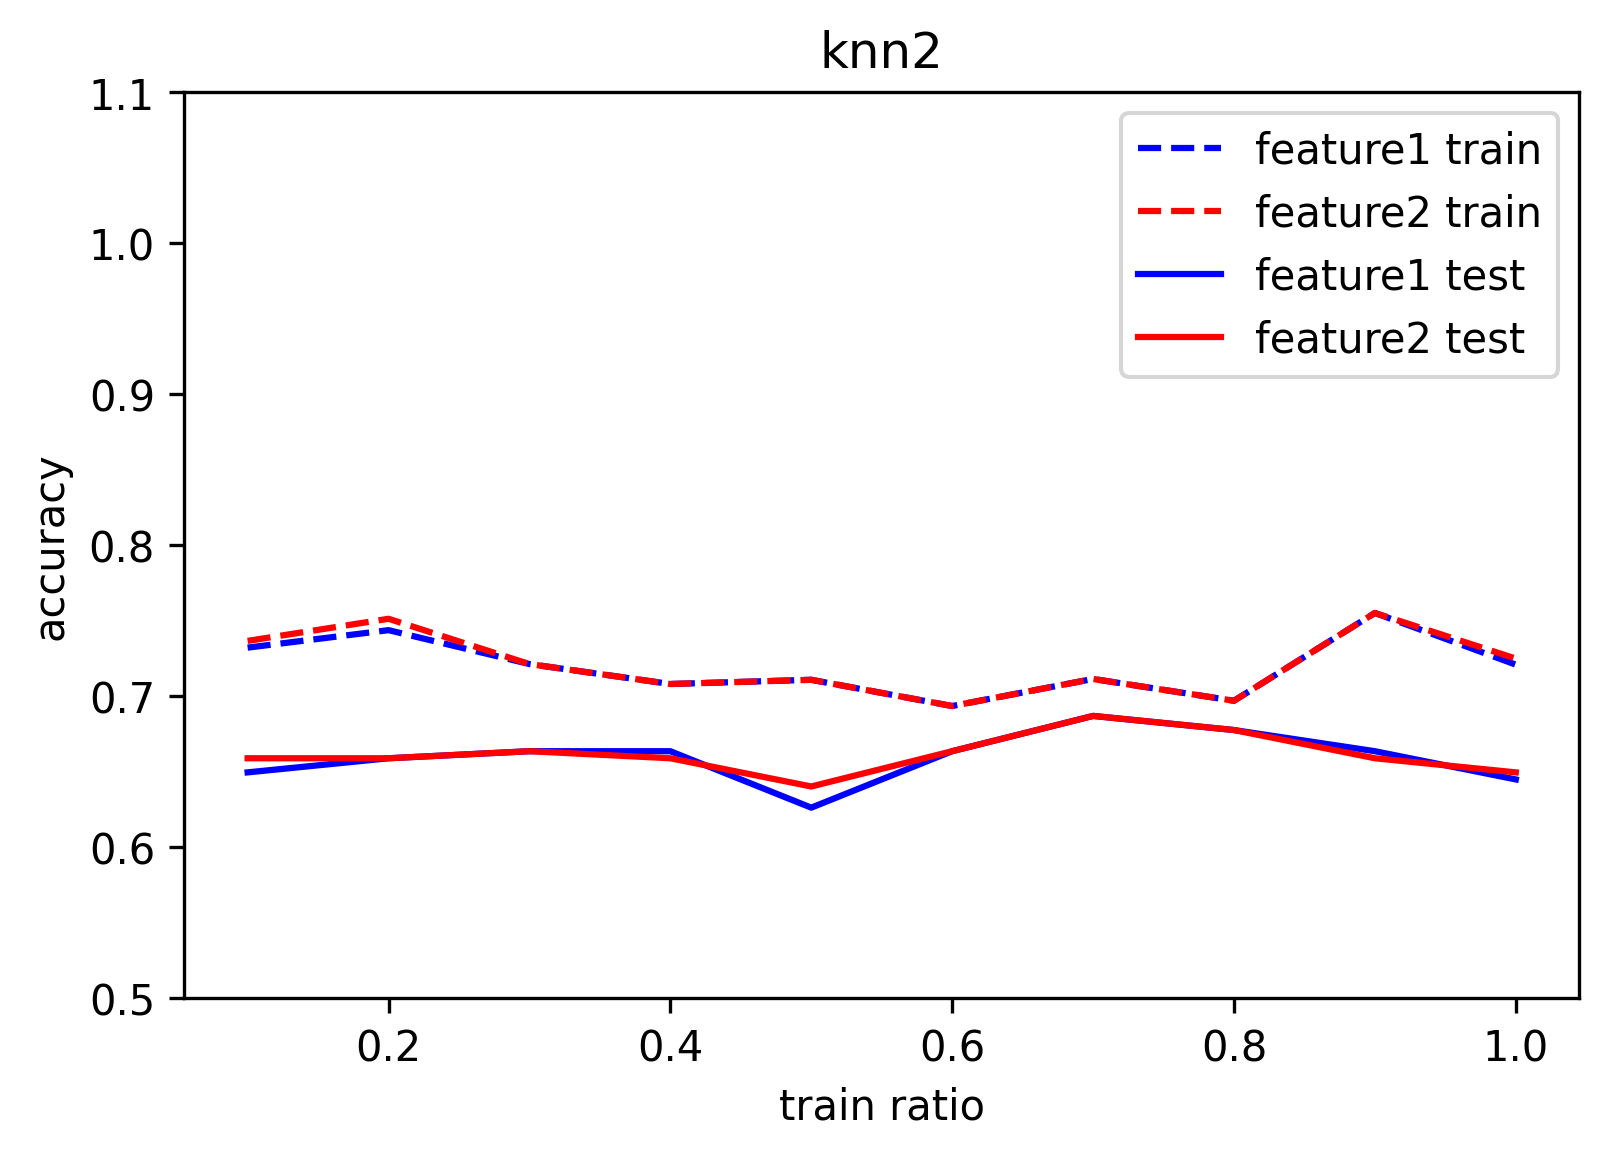

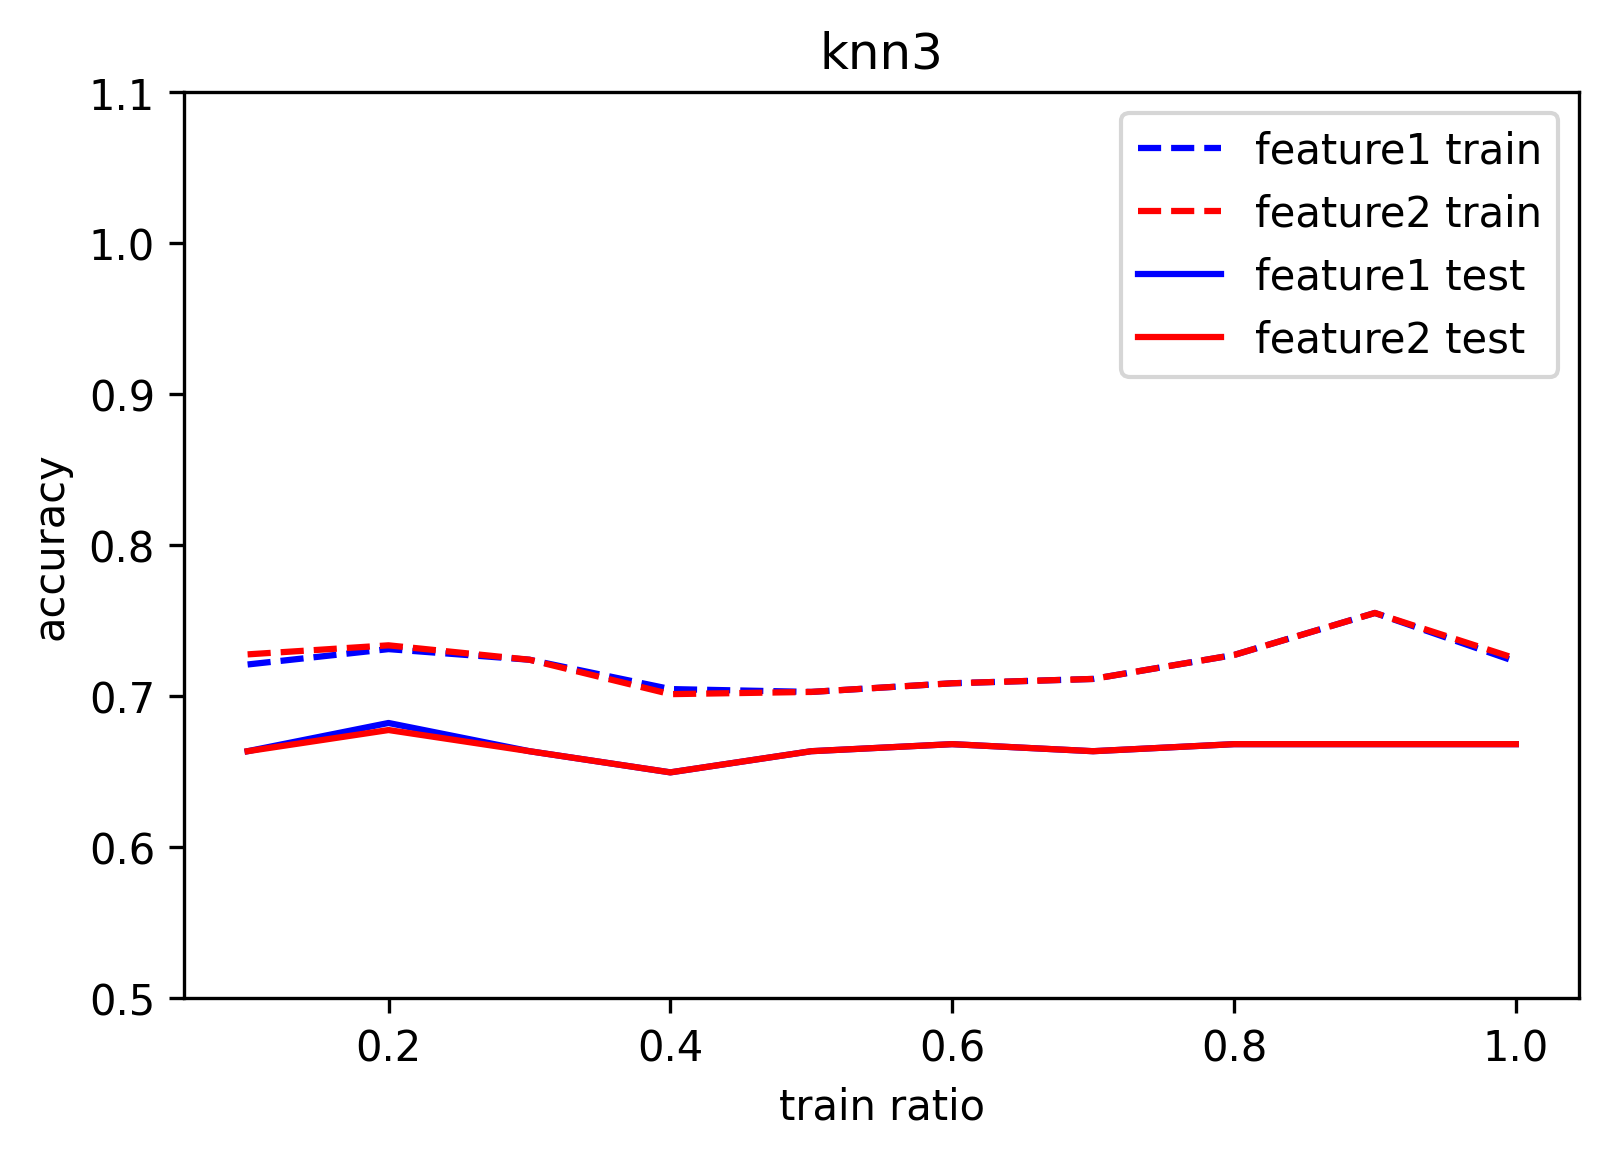

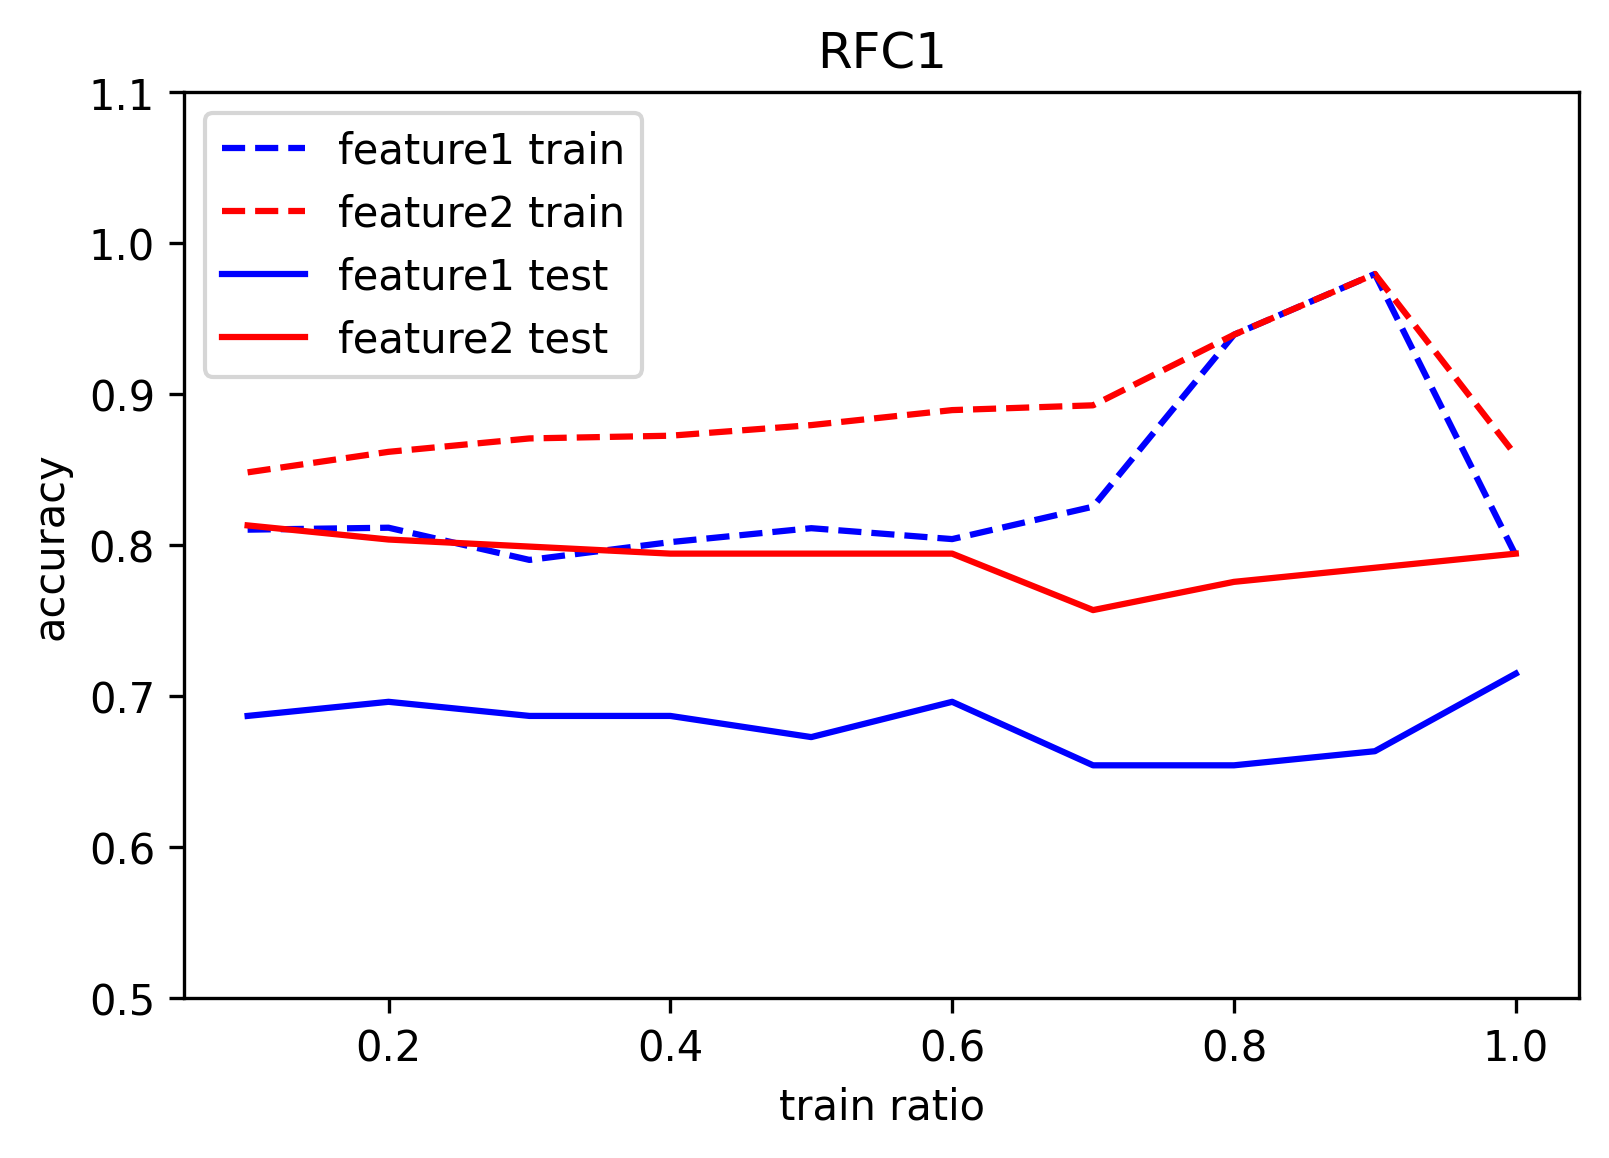

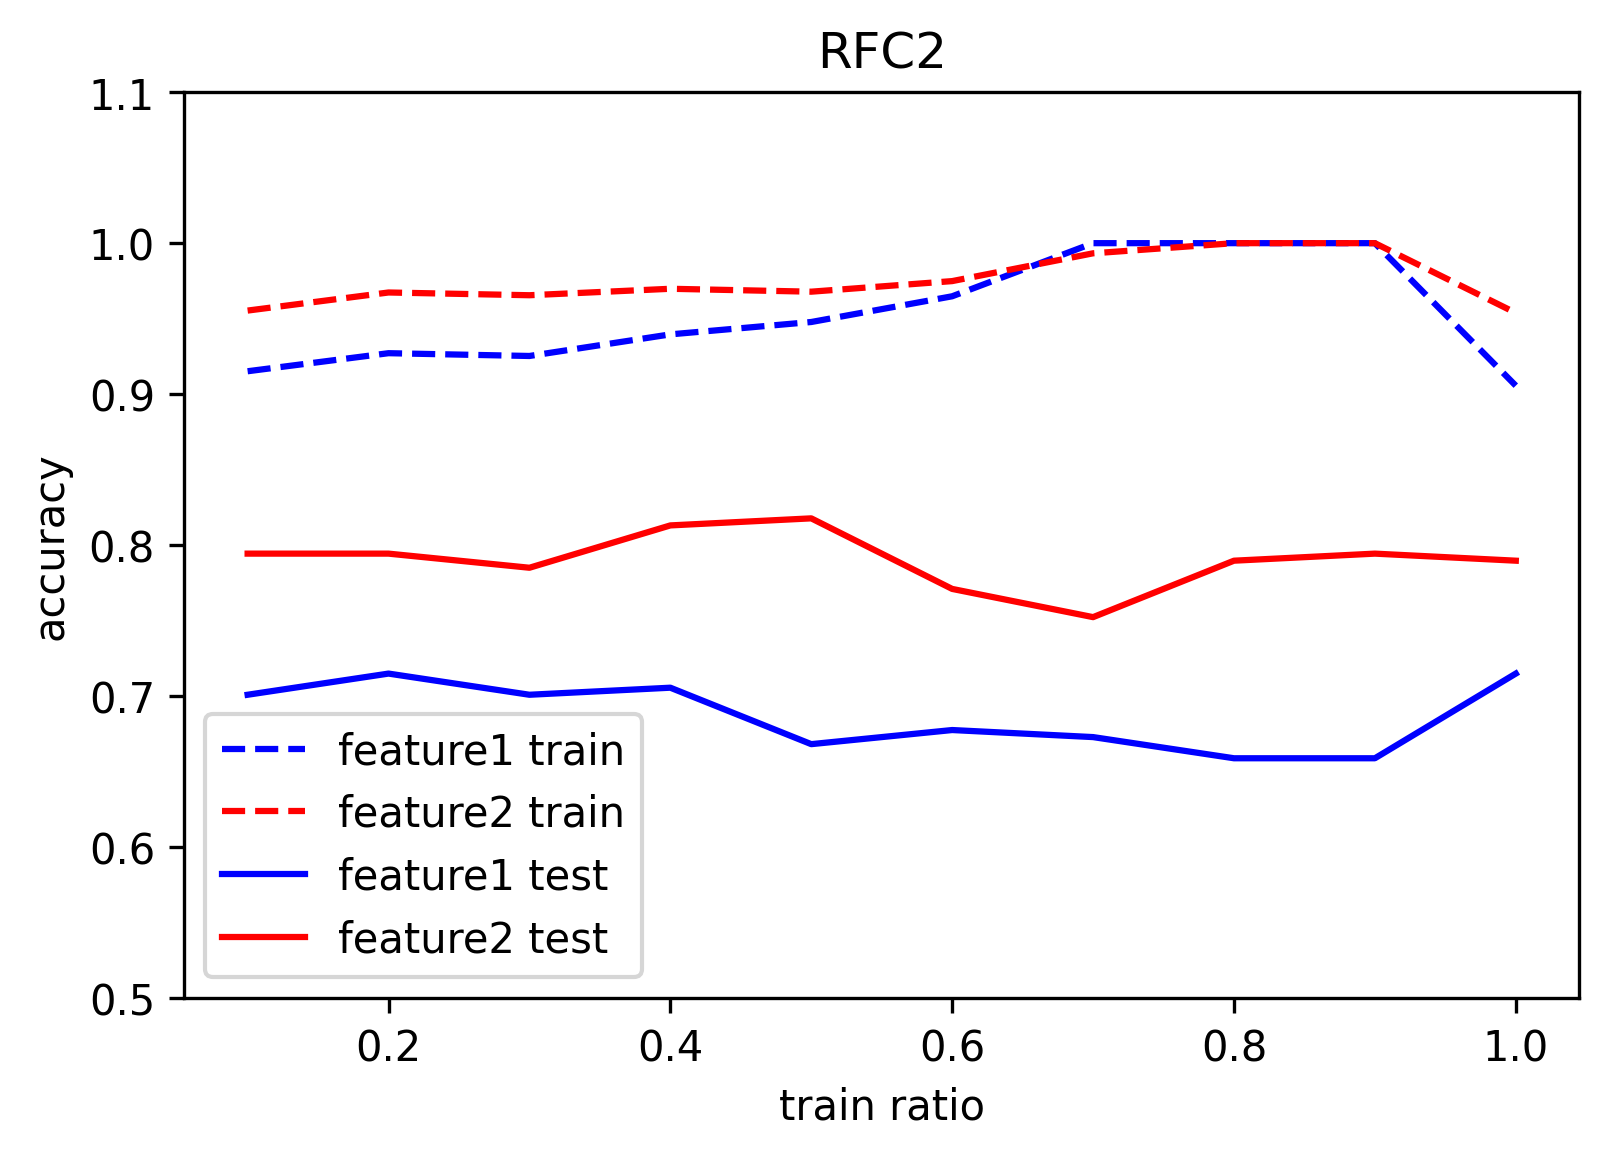

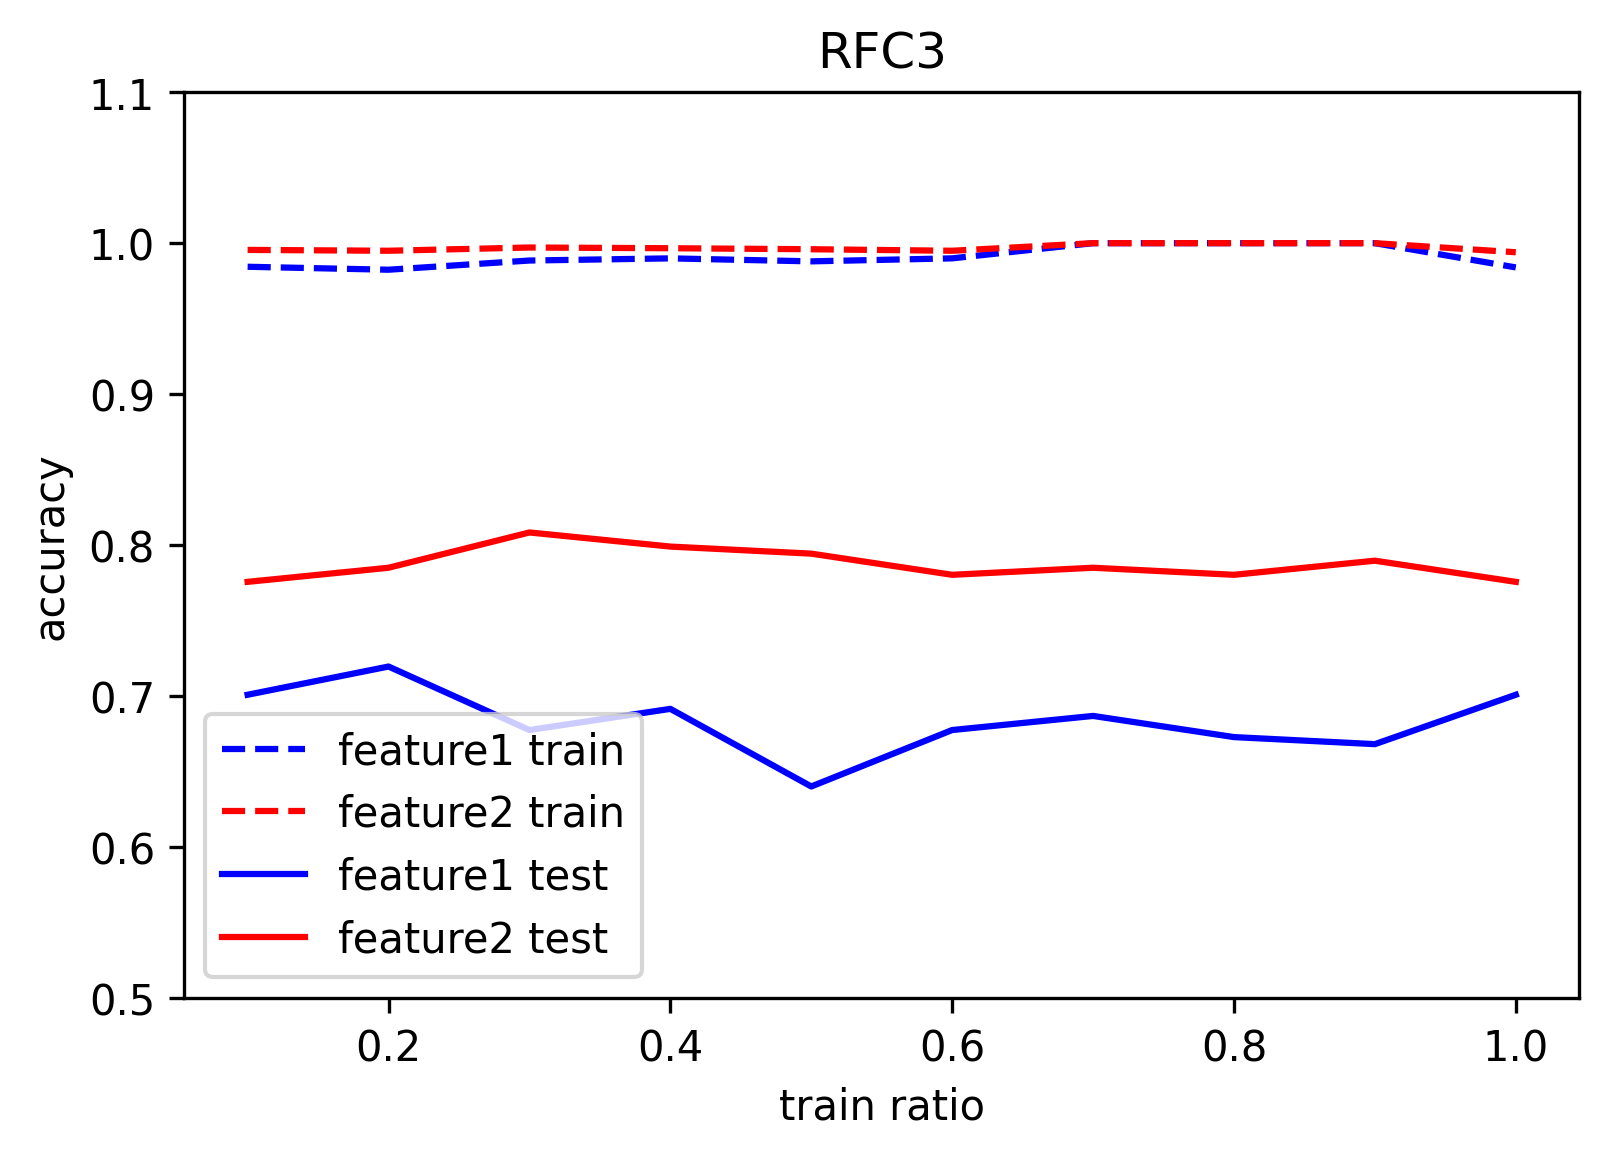

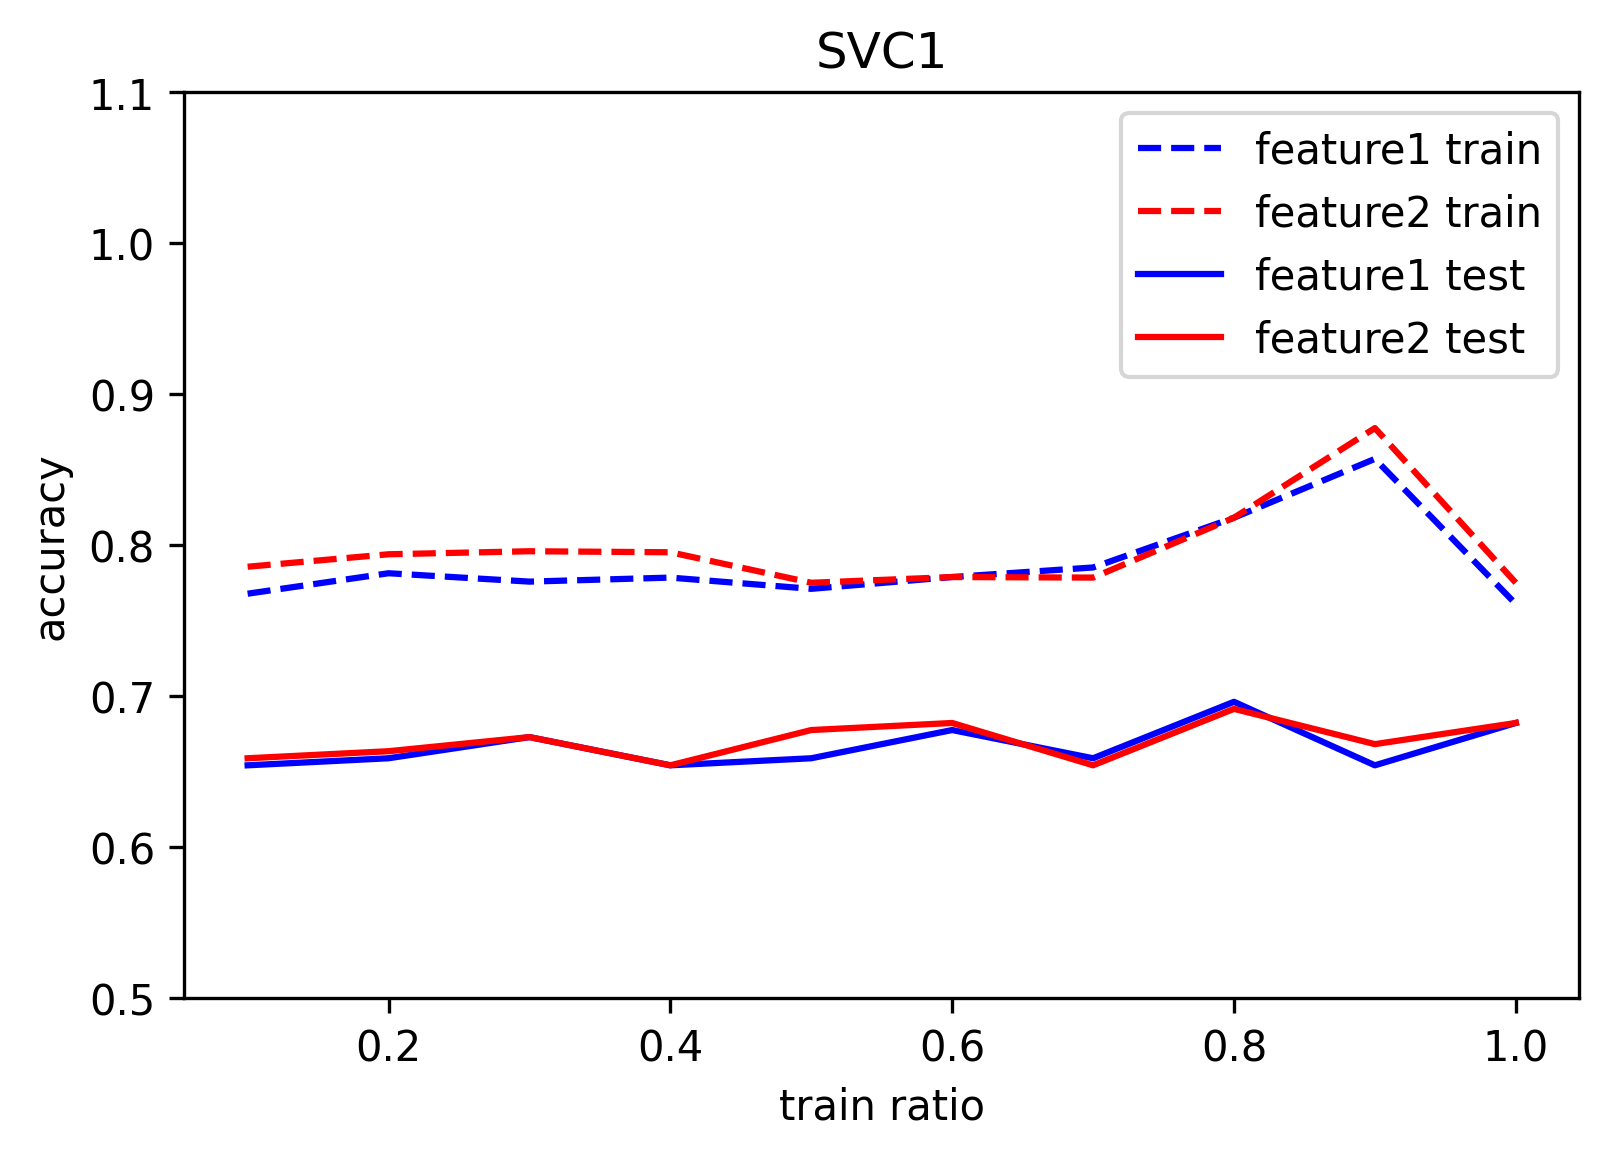

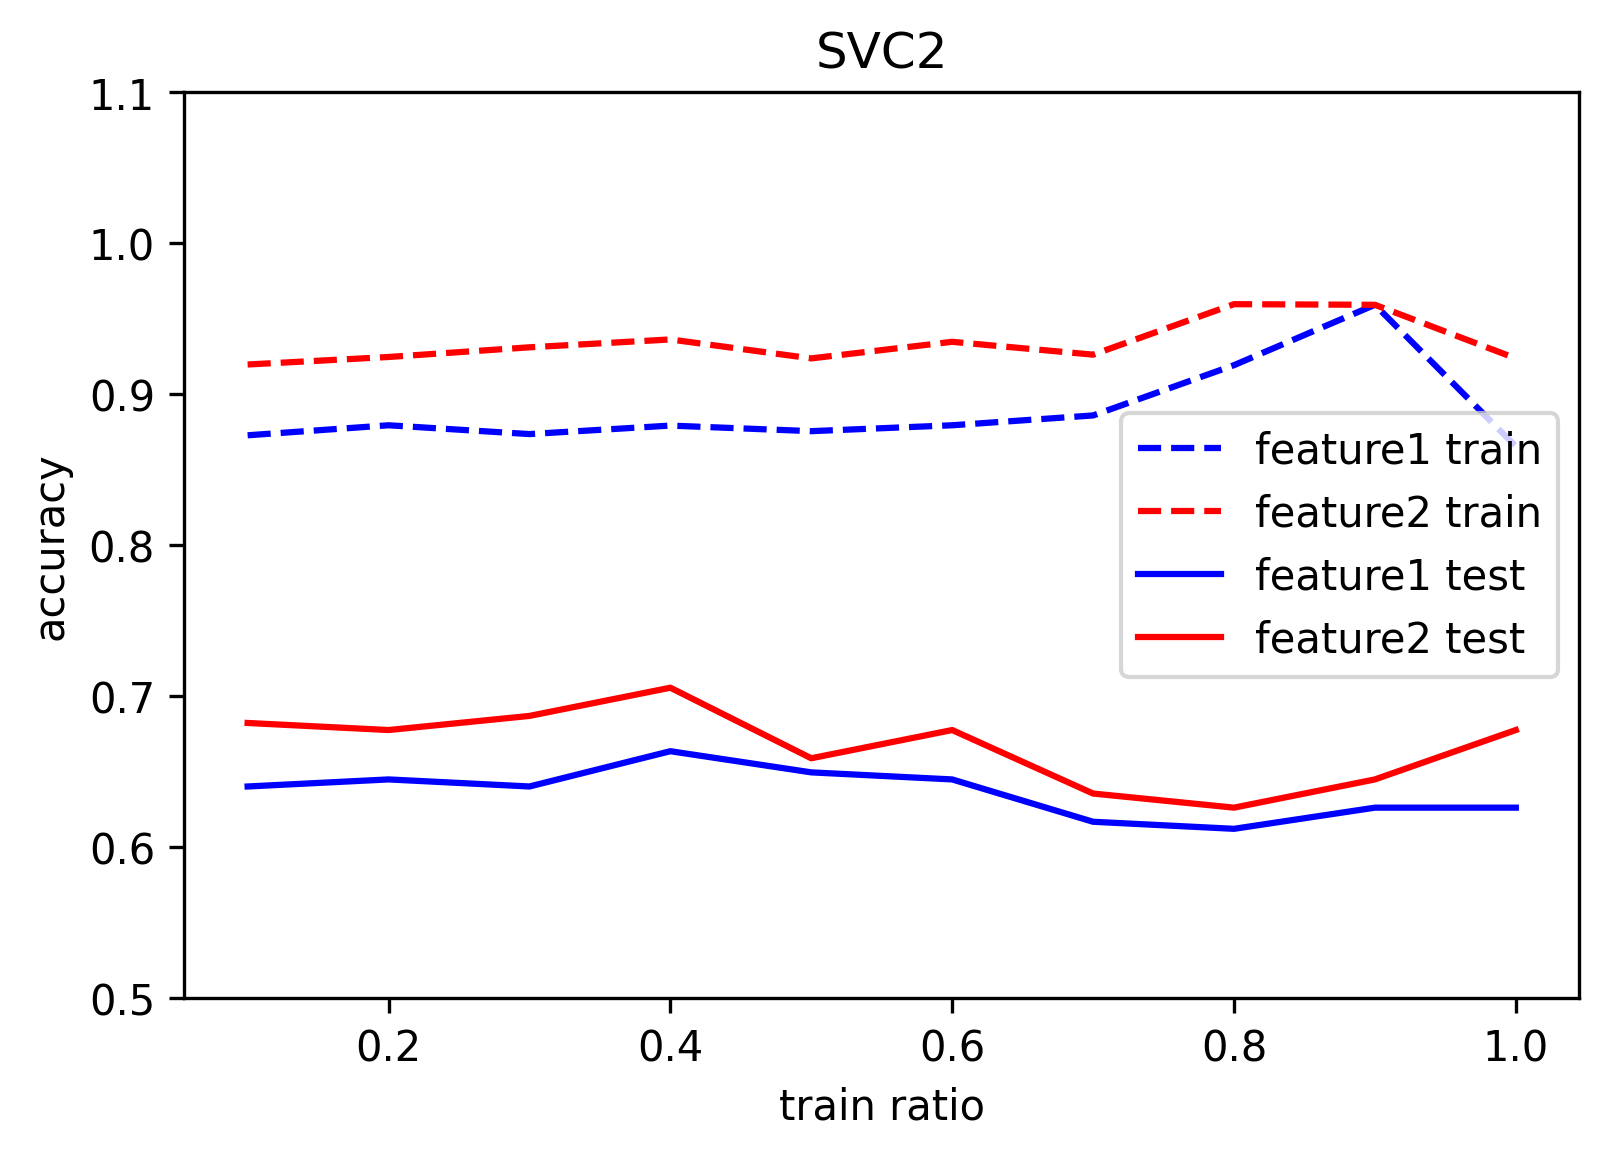

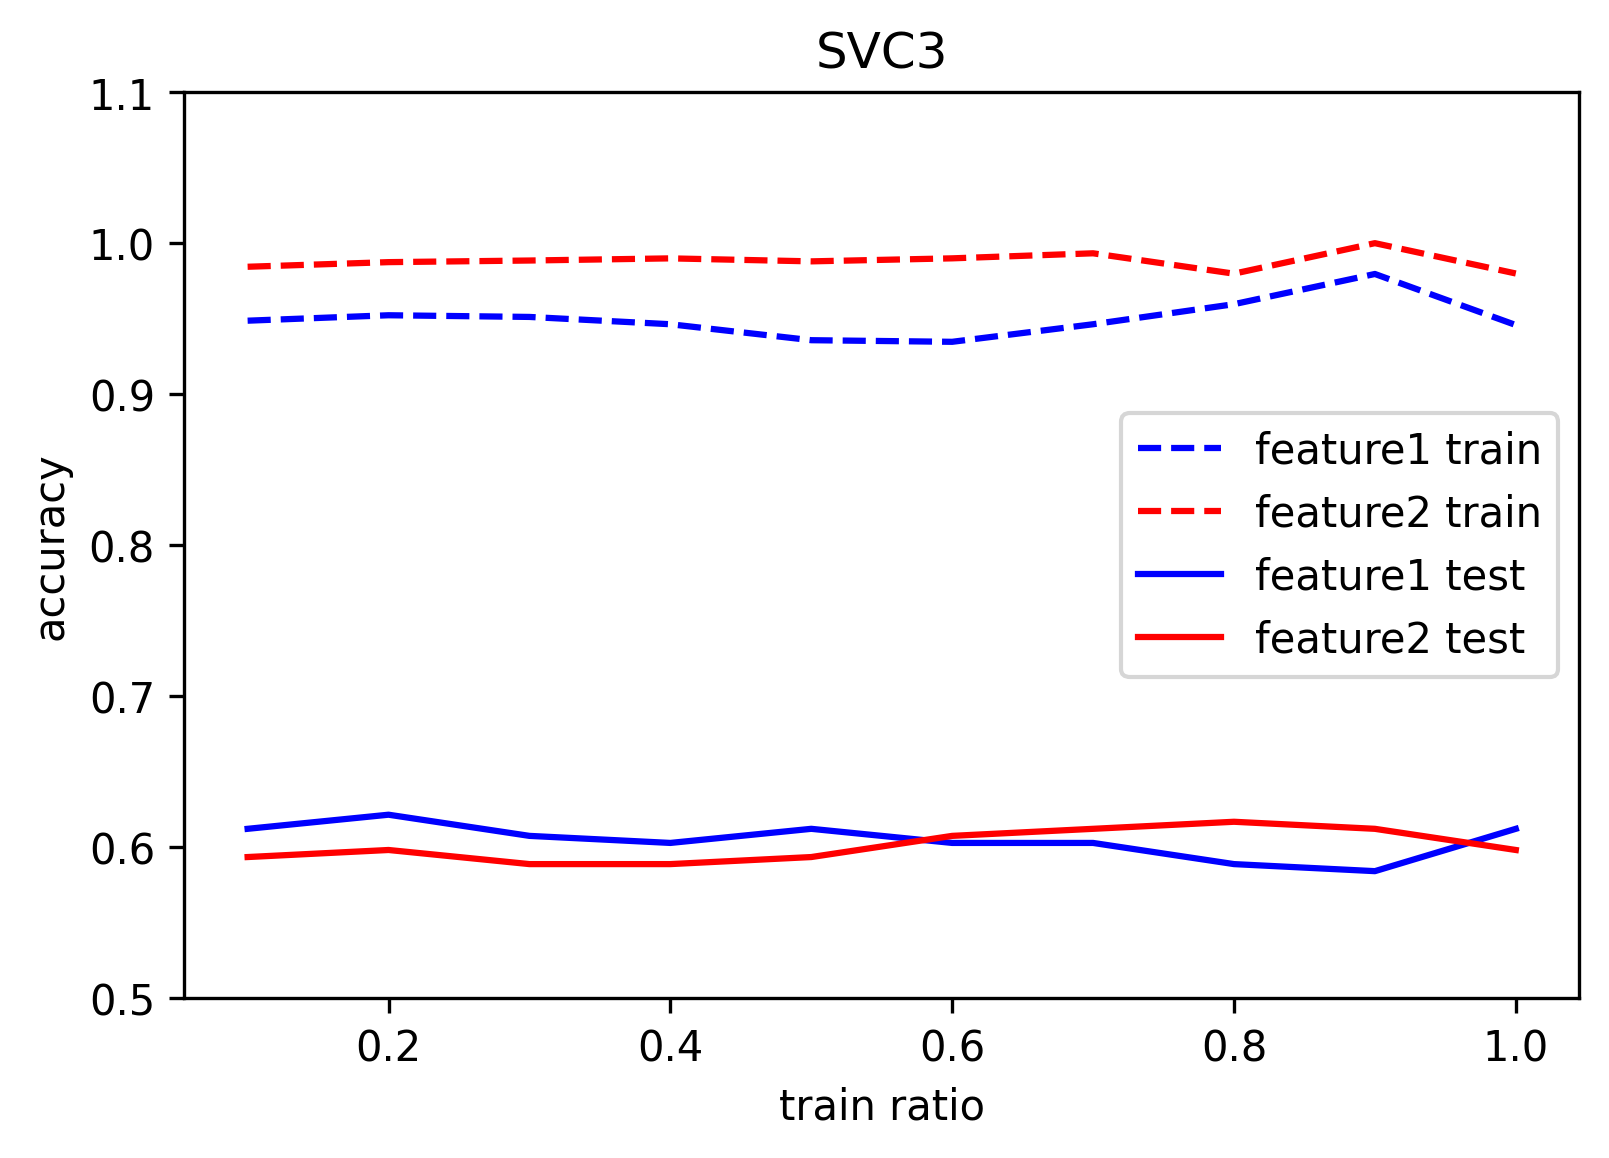

In [224]:
for model in results:
    result = results[model]
    train1,test1,train2,test2=[],[],[],[]
    n = len(train_ratio)
    for i in range(n):
        train1.append(result[i][1][0])
        test1.append(result[i][1][1])
    for j in range(n, 2*n):
        train2.append(result[j][1][0])
        test2.append(result[j][1][1])
        
    plt.figure(dpi=300)
    plt.plot(train_ratio, train1, color='b', linestyle='dashed', label='feature1'+' train')
    plt.plot(train_ratio, train2, color='r', linestyle='dashed', label='feature2'+' train')
    plt.plot(train_ratio, test1, color='b', label='feature1'+' test')
    plt.plot(train_ratio, test2, color='r', label='feature2'+' test')
    plt.legend()
    plt.xlabel('train ratio')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 1.1)
    plt.title(model)
    
    filepath='fig/'+model
    plt.savefig(filepath, dpi=300)

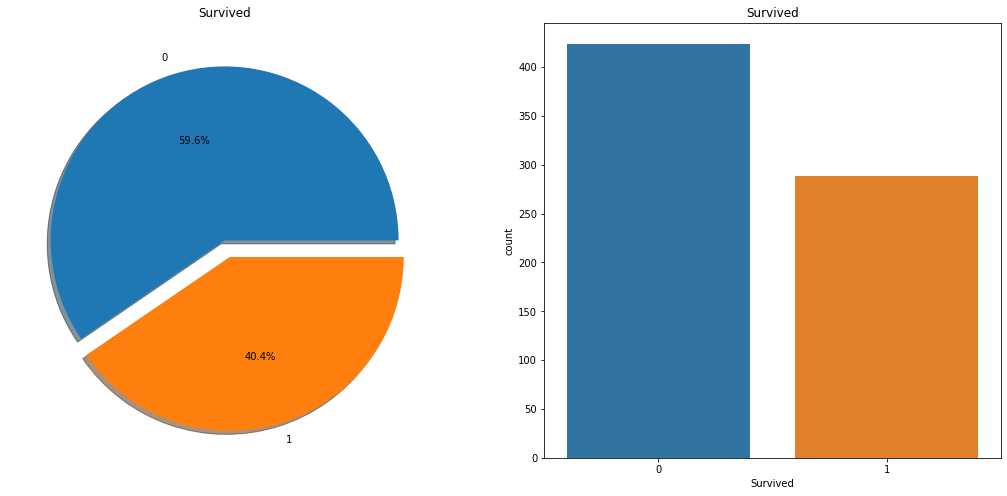

In [225]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

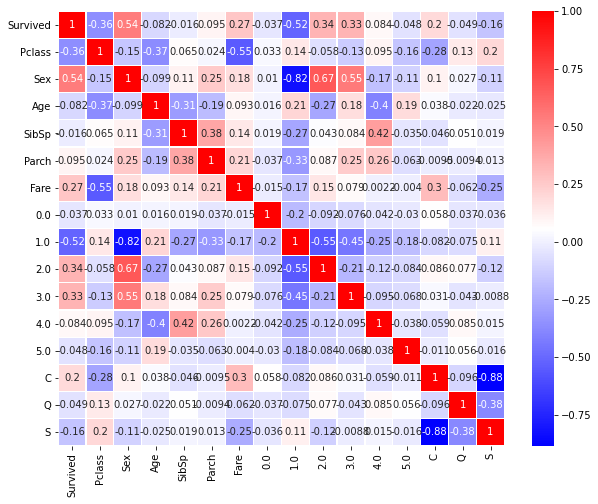

In [226]:
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

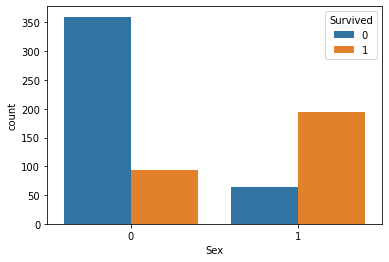

In [240]:
sns.countplot('Sex',hue='Survived',data=df)
plt.show()

In [227]:
X2_test_male=[]
X2_test_female=[]
y2_test_male=[]
y2_test_female=[]
for i in range(len(X2_test)):
    X = X2_test[i]
    if X[1]==0:
        X2_test_male.append(X)
        y2_test_male.append(y2_test[i])
    else:
        X2_test_female.append(X)
        y2_test_female.append(y2_test[i])

In [228]:
len(X2_test_female)

82

In [229]:
len(X2_test)

214

In [230]:
for model in [model2, model5, model7]:
    model.fit(X2_train, y2_train)
    pred = model.predict(X2_train)
    pred_test = model.predict(X2_test)
    pred_male = model.predict(X2_test_male)
    pred_female = model.predict(X2_test_female)
    print(accuracy_score(pred_test, y2_test), accuracy_score(y2_test_male, pred_male), accuracy_score(y2_test_female, pred_female))

0.6495327102803738 0.75 0.4878048780487805
0.8084112149532711 0.803030303030303 0.8170731707317073
0.6822429906542056 0.7727272727272727 0.5365853658536586


モデル |全体の正答率 | 男性のデータに対する正答率 | 女性のデータに対する正答率
---|---|---|---
knn2|0.650|0.750|0.489
RFC2|0.808|0.803|0.817
SVM2|0.682|0.773|0.534


In [231]:
X2_test[pred_test==y2_test][1:10]

array([[ 2.    ,  0.    , 50.    ,  0.    ,  0.    , 13.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  0.    , 28.    ,  2.    ,  0.    ,  7.925 ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         1.    ],
       [ 2.    ,  0.    , 51.    ,  0.    ,  0.    , 12.525 ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,
         1.    ],
       [ 2.    ,  0.    , 42.    ,  0.    ,  0.    , 13.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  0.    , 26.    ,  1.    ,  0.    ,  7.8542,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         1.    ],
       [ 1.    ,  0.    , 61.    ,  0.    ,  0.    , 33.5   ,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  0.    , 50.    ,  0.  